<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Table of content</div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
* [1. Introduction](#1)
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    
* [2. Import libraries](#2)    
* [3. Basic Exploration](#3)
    - [Read dataset](#3.0)
    - [Some information](#3.1)
    - [Data visualization](#3.2)
* [4. Data preprocessing](#4)
* [5. Machine Learning model](#5)
    - [Logistic Regression](#5.1)
    - [Random Forest Classifier](#5.2)
    - [Hyperparameter Tuning of Random Forest](#5.3)
    - [Decision Tree Classifier](#5.4)
    - [Hyperparameter Tuning of Decision Tree](#5.5)
    
* [6. Conclusion](#6)
    

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Introduction</div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Problem</b> statement

<span style="font-size:14px; font-family:Verdana;"> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.<br>
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.<br>
For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if God forbid, you fall ill and need to be hospitalized in that year, the insurance provider company will bear the cost of hospitalization, etc. for up to Rs. 200,000. Now if you are wondering how can the company bear such high hospitalization costs when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes into the picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalized that year, and not everyone. This way everyone shares the risk of everyone else.<br>
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of a certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide compensation (called ‘sum assured’) to the customer. <br>
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.<br>
Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel), etc.</span>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Data</b> description

|No  | Columns name |  Meaning |
|:---| :---         |:---      |
| 1  | <font color="#254441"> id </font>  |  Unique ID for the customer |
| 2  | <font color="#254441"> Gender </font>  | Gender of customer |  
| 3  | <font color="#254441"> Age</font>  | Age of customer |  
| 4  | <font color="#254441"> Driving_License </font>  | 1 : Customer already has Vehicle Insurance <br> 0 : Customer doesn't have Vehicle Insurance |  
| 5  | <font color="#254441"> Region_Code</font>  | Unique code for the region of the customer |  
| 6  | <font color="#254441"> Previously_Insured </font>  | 1 : Customer already has Vehicle Insurance <br> 0 : Customer doesn't have Vehicle Insurance |  
| 7  | <font color="#254441"> Vehicle_Age</font>  | Age of vehicle |  
| 8  | <font color="#254441"> Vehicle_Damage</font>  | 1: Customer got his/her vehicle damaged in the past <br> 0 : Customer didn't get his/her vehicle damaged in the past|  
| 9  | <font color="#254441"> Annual_Premium</font>  | The amount customer needs to pay as premium in the year |  
| 10  | <font color="#254441"> PolicySalesChannel</font>  | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |  
| 11  | <font color="#254441"> Vintage</font>  | Number of Days, Customer has been associated with the company |  
| 12  | <font color="#254441"> Response</font>  |  1: Customer is interested <br> 0 : Customer is not interested |  

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Importing Libraries</div>

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Basic Exploration</div>

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Read</b> dataset

In [2]:
raw_train_df=pd.read_csv('train.csv')
raw_test_df=pd.read_csv('test.csv')

<a id="3.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Some</b> information

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Display data content</b></span>

In [3]:
raw_train_df.head().style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

In [4]:
raw_test_df.head().style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Number of rows, number of columns</b></span>

In [5]:
train_num_rows, train_num_cols = raw_train_df.shape
print(f'Train data \nNumber of rows : {train_num_rows}\nNumber of columns: {train_num_cols}')

Train data 
Number of rows : 381109
Number of columns: 12


In [6]:
test_num_rows, test_num_cols = raw_test_df.shape
print(f'Train data \nNumber of rows : {test_num_rows}\nNumber of columns: {test_num_cols}')

Train data 
Number of rows : 127037
Number of columns: 11


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Basic info</b></span>

In [7]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Count null/nan values</b></span>

In [9]:
raw_train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
raw_train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
raw_test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
raw_test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>The train and test datasets both have null/nan values. So we don't need to deal with missing values</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Description</b></span>

In [13]:
raw_train_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [14]:
raw_train_df.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [15]:
raw_test_df.describe()

id            Age  Driving_License    Region_Code  \
count  127037.000000  127037.000000    127037.000000  127037.000000   
mean   444628.000000      38.765903         0.998134      26.459866   
std     36672.567411      15.465814         0.043152      13.209916   
min    381110.000000      20.000000         0.000000       0.000000   
25%    412869.000000      25.000000         1.000000      15.000000   
50%    444628.000000      36.000000         1.000000      28.000000   
75%    476387.000000      49.000000         1.000000      35.000000   
max    508146.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel        Vintage  
count       127037.000000   127037.000000         127037.000000  127037.000000  
mean             0.460039    30524.643576            111.800468     154.318301  
std              0.498403    16945.297103             54.371765      83.661588  
min              0.000000     2630.000000              1.000000      10.000000  
25%              0.000000    24325.000000             26.000000      82.000000  
50%              0.000000    31642.000000            135.000000     154.000000  
75%              1.000000    39408.000000            152.000000     227.000000  
max              1.000000   472042.000000            163.000000     299.000000

In [16]:
raw_test_df.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   127037      127037         127037
unique       2           3              2
top       Male    1-2 Year            Yes
freq     68236       66699          63835

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>Data </b> visualization

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Gender and Response</b></span>

In [17]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Gender and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>It is noticable that Gender does not play much role in Response of the Customer and the ratio for both positive and negative response is almost equal.</i></div>


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Age and Response</b></span>

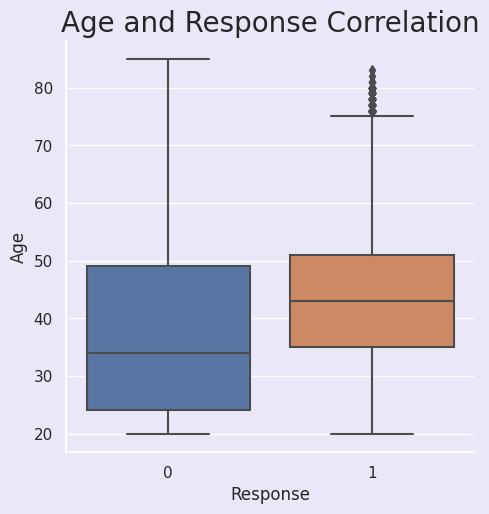

In [18]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Response",y="Age", data=raw_train_df, kind='box')
plt.title("Age and Response Correlation", size=20, y=1.0);

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>Young people (under 35) have little interest in insurance.<br>
People over the age of 35 tend to be more interested in insurance.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Driving License and Response</b></span>

In [19]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Driving_License',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Driving License and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>Having a driver's license doesn't play much of a role in Customer Feedback.</i></div>


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Region code and Response</b></span>

In [20]:
fig=px.histogram(raw_train_df,
                x='Region_Code',
                marginal='box',
                color='Response',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Region code and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>Less correlation is there between region and response.</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Vintage and Response</b></span>

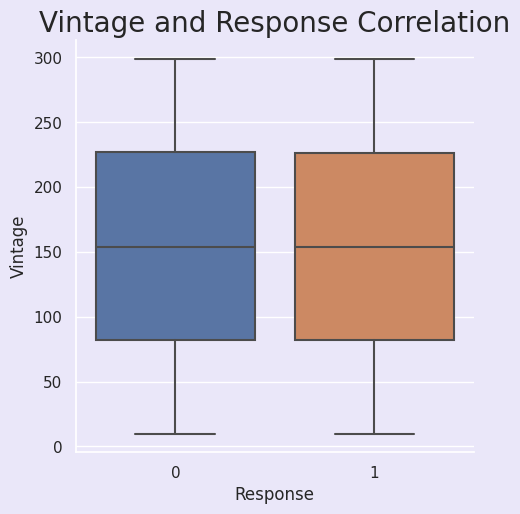

In [21]:
sns.catplot(x="Response", y="Vintage", data=raw_train_df, kind="box")
plt.title("Vintage and Response Correlation", size=20, y=1.0);

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>It seems that Vintage has no effect on the response. The rate of positive and negative feedback seems to be about the same</i></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Vehicle_Damage and Response</b></span>

In [22]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#87C691', '#AD87C6'],
                title='Vehicle_Damage and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>Damaged vehicles tend to respond positively</i></div>

In [23]:
corr_data=raw_train_df.drop(['id'], inplace=False, axis=1)

<ipython-input-24-4ad0baf1df4e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-24-4ad0baf1df4e>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



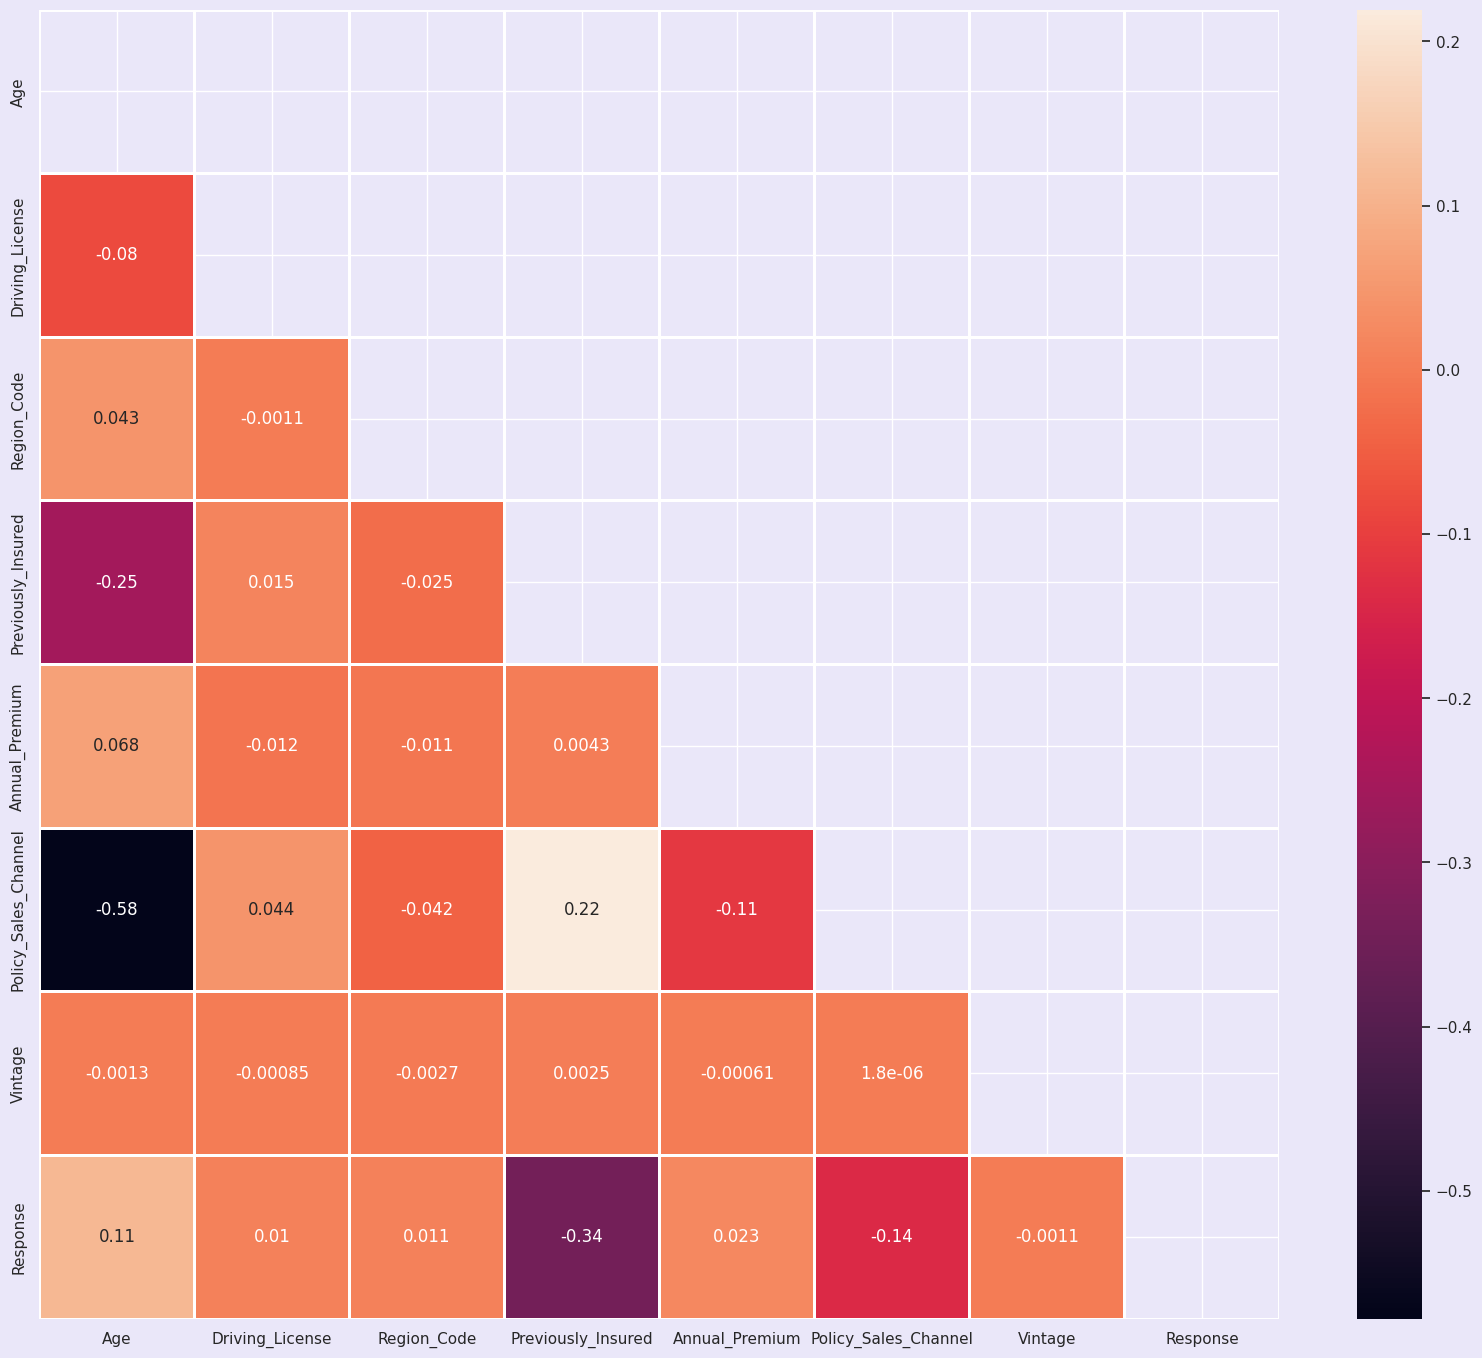

In [24]:
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

<a id="4"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Data preprocessing</div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Remove meaningless lines for the model</b></span>

`Id` column that is not meaningful for the model can be removed from both train and test data.

In [25]:
raw_train_df.drop("id", inplace=True, axis=1)
raw_test_df.drop("id",inplace=True, axis=1)

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Categorical data into numeric data</b></span>

In [26]:
raw_train_df['Gender']=raw_train_df['Gender'].replace({'Male':1,'Female':0})
raw_test_df['Gender']=raw_test_df['Gender'].replace({'Male':1,'Female':0})

In [27]:
raw_train_df['Vehicle_Age'].unique()
raw_test_df['Vehicle_Age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [28]:
raw_train_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_train_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)
raw_test_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_test_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Now, we already have the processed data call `train_df` and `test_df`</b></span>

In [29]:
train_df=raw_train_df
test_df=raw_test_df

#Print
train_df.head()
test_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   25                1         11.0                   1            1   
1       1   40                1         28.0                   0            2   
2       1   47                1         28.0                   0            2   
3       1   24                1         27.0                   1            1   
4       1   27                1         28.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               0         35786.0                 152.0       53  
1               1         33762.0                   7.0      111  
2               1         40050.0                 124.0      199  
3               1         37356.0                 152.0      187  
4               0         59097.0                 152.0      297

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Correlation between attributes</b></span>

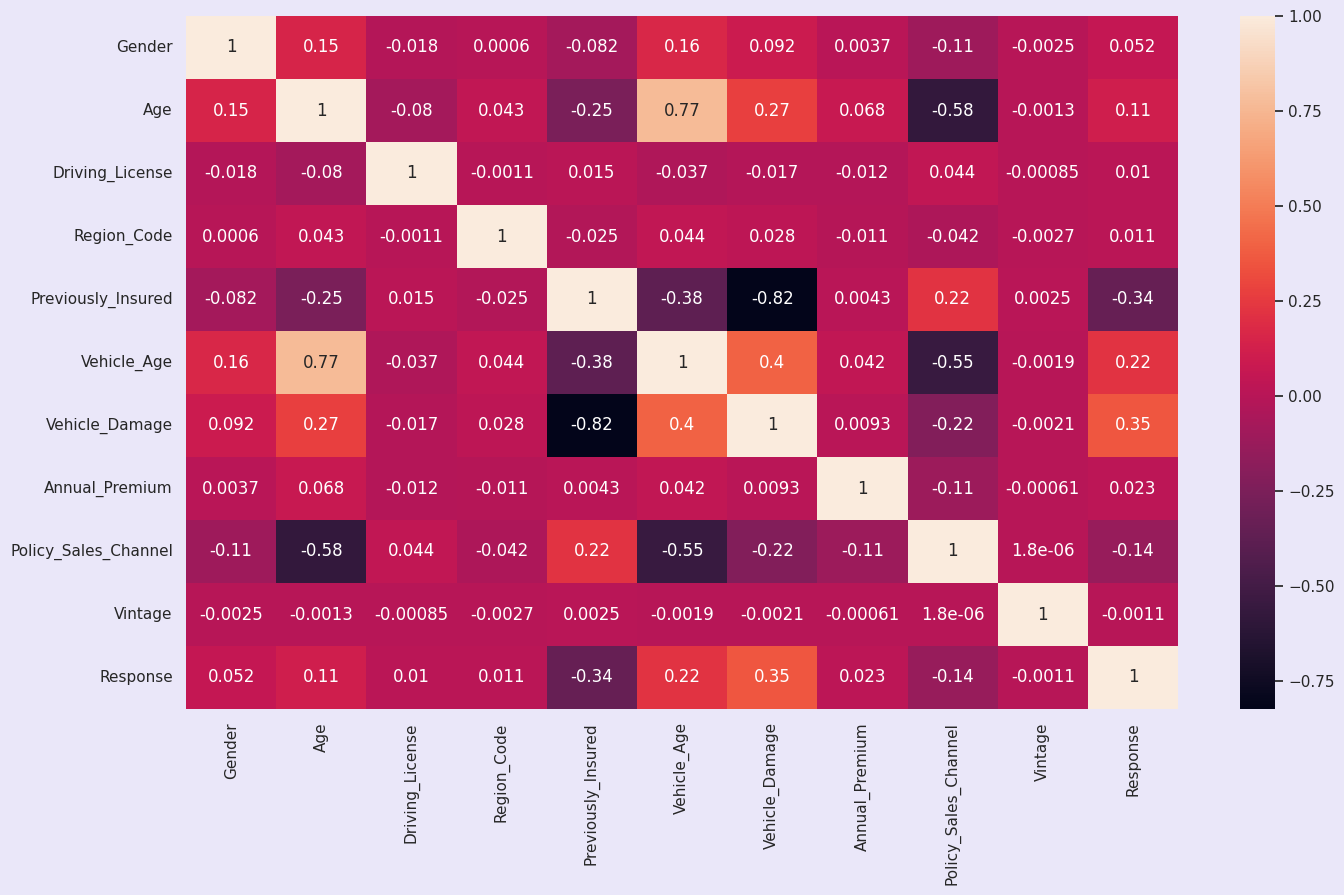

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(), annot=True);

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Highly correlated columns wrt to target columns which can give us `better accuracy`.</b></span>

In [31]:
hig_corr = train_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Scaling numeric data</b></span>

In [32]:
numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numeric_cols])
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [34]:
train_df.describe().loc[['min', 'max']].style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

In [35]:
test_df.describe().loc[['min', 'max']]

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0  0.0              0.0          0.0                 0.0   
max     1.0  1.0              1.0          1.0                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0        0.000000                   0.0   
max          3.0             1.0        0.873268                   1.0   

     Vintage  
min      0.0  
max      1.0

In [36]:
train_df.head().style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

In [37]:
test_df.head().style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Machine Learning model</div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Get `input` and `target` columns</b></span>

In [38]:
input_cols=list(train_df.columns)[0:-1]
target_col='Response'

In [39]:
inputs=train_df[input_cols]
targets=train_df[target_col]

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Splitting data for the training</b></span>

In [40]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets,val_targets=train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [41]:
val_inputs.head().style.set_properties(**{"background-color": "#254E58","color":"#e9c46a","border": "1.5px solid black"})

In [42]:
len(val_inputs)

76222

In [43]:
len(val_targets)

76222

<a id="5.1"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Logistic Regression</b></span>

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [45]:
train_inputs.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [46]:
train_inputs.dropna()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
332803       0  0.292308                1     0.288462                   0   
116248       1  0.276923                1     0.211538                   0   
255005       1  0.030769                1     0.576923                   1   
317474       0  0.046154                1     0.788462                   1   
344212       1  0.553846                1     0.923077                   0   
...        ...       ...              ...          ...                 ...   
259178       0  0.061538                1     0.692308                   1   
365838       1  0.553846                1     0.673077                   0   
131932       0  0.030769                1     0.038462                   0   
146867       1  0.369231                1     0.615385                   1   
121958       0  0.107692                1     0.711538                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
332803            2               1        0.093531              0.333333   
116248            2               1        0.037966              0.154321   
255005            1               0        0.079414              0.932099   
317474            1               0        0.049303              0.925926   
344212            3               1        0.000000              0.944444   
...             ...             ...             ...                   ...   
259178            1               0        0.037105              0.932099   
365838            2               1        0.071915              0.759259   
131932            1               1        0.030188              0.932099   
146867            2               1        0.000000              0.956790   
121958            1               1        0.041134              0.932099   

         Vintage  
332803  0.750865  
116248  0.065744  
255005  0.539792  
317474  0.923875  
344212  0.501730  
...          ...  
259178  0.958478  
365838  0.996540  
131932  0.228374  
146867  0.141869  
121958  0.404844  

[304887 rows x 10 columns]

In [47]:
model=LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [48]:
%%time
train_preds=model.predict(train_inputs)
train_probs=model.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds)

CPU times: user 50.6 ms, sys: 32.1 ms, total: 82.7 ms
Wall time: 46.3 ms


0.8779154244031395

In [49]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets,name=''):
    preds=model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

Accuracy: 87.79%
CPU times: user 172 ms, sys: 128 ms, total: 300 ms
Wall time: 159 ms


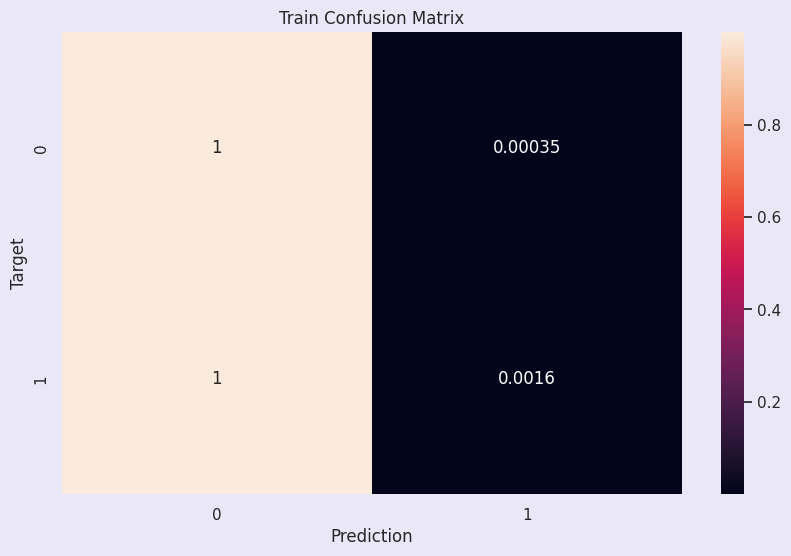

In [50]:
%%time
train_preds=predict_and_plot(train_inputs, train_targets,'Train')

Accuracy: 87.50%
CPU times: user 107 ms, sys: 64.5 ms, total: 172 ms
Wall time: 97.9 ms


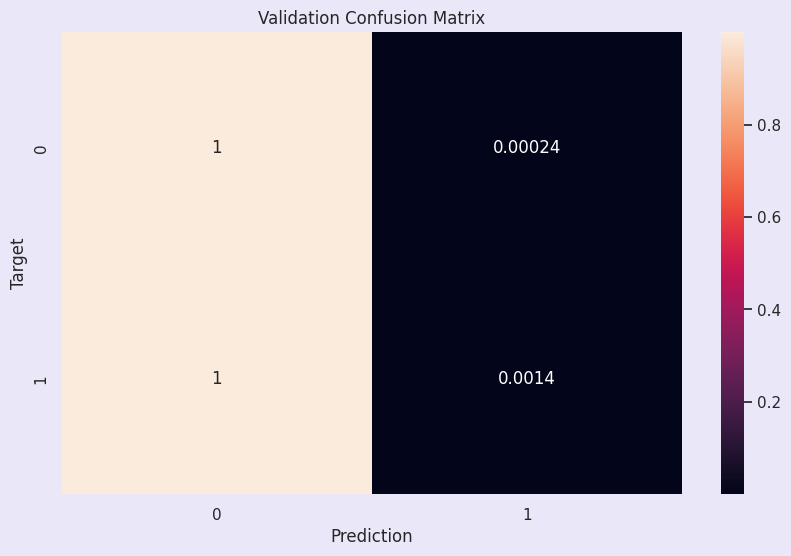

In [51]:
%%time
val_preds=predict_and_plot(val_inputs, val_targets,'Validation')

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Training Accuracy - 87.79% <br>
Validation Accuracy - 87.50%</div>

<a id="5.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Random Forest Classifier </b></span>

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_jobs=-1, random_state=42)
model_2.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
%%time
model_2.score(train_inputs, train_targets)

CPU times: user 7.65 s, sys: 39.6 ms, total: 7.69 s
Wall time: 4.02 s


0.9998622440445148

In [54]:
from sklearn.metrics import confusion_matrix
def predict_and_plot_2(inputs, targets,name=''):
    preds=model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

Accuracy: 86.50%
CPU times: user 2.14 s, sys: 22.9 ms, total: 2.16 s
Wall time: 1.2 s


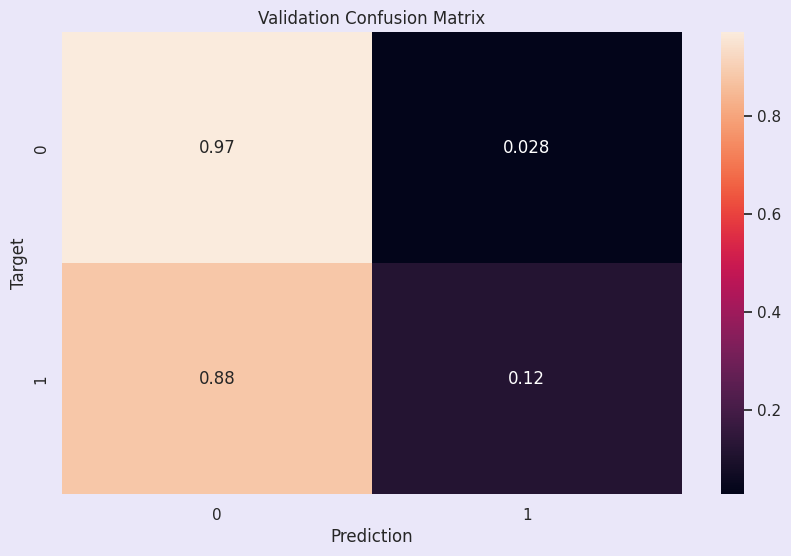

In [55]:
%%time
val_preds_2 = predict_and_plot_2(val_inputs, val_targets, 'Validation')

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Random forest without hyperparameter turning</b><br>
Training Accuracy - 99.99% <br>
Validation Accuracy - 86.50%<br>
<b>This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.</b></div>

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of Random Forest </b></span>

In [56]:
model_2.feature_importances_

array([0.01377792, 0.14299035, 0.00052909, 0.10698464, 0.04813046,
       0.01911754, 0.07683715, 0.24981284, 0.06238414, 0.27943588])

In [57]:
importance_df=pd.DataFrame({
    'feature':train_inputs.columns,
    'importance':model_2.feature_importances_
}).sort_values('importance',ascending=False)

In [58]:
importance_df

feature  importance
9               Vintage    0.279436
7        Annual_Premium    0.249813
1                   Age    0.142990
3           Region_Code    0.106985
6        Vehicle_Damage    0.076837
8  Policy_Sales_Channel    0.062384
4    Previously_Insured    0.048130
5           Vehicle_Age    0.019118
0                Gender    0.013778
2       Driving_License    0.000529

**Testing for `n_estimators` hyperparameter**

In [59]:
model_2_1_1 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 10)

In [60]:
model_2_1_1.fit(train_inputs,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [61]:
%%time
model_2_1_1.score(train_inputs, train_targets)

CPU times: user 773 ms, sys: 8.95 ms, total: 781 ms
Wall time: 435 ms


0.986667191451259

In [62]:
%%time
model_2_1_1.score(val_inputs, val_targets)

CPU times: user 210 ms, sys: 3.89 ms, total: 213 ms
Wall time: 135 ms


0.8618509091863241

In [63]:
%%time
model_2_1_2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 20)
model_2_1_2.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_1_2.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_1_2.score(val_inputs, val_targets))

Training Accuracy =  0.9956410079800057
Validation Accuracy =  0.8631497467922647
CPU times: user 11.5 s, sys: 65.2 ms, total: 11.5 s
Wall time: 6.13 s


In [64]:
%%time
model_2_1_3 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 100)
model_2_1_3.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_1_3.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_1_3.score(val_inputs, val_targets))

Training Accuracy =  0.9998622440445148
Validation Accuracy =  0.8649733672692923
CPU times: user 58 s, sys: 307 ms, total: 58.3 s
Wall time: 32.3 s


In [65]:
%%time
model_2_1_4 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 200)
model_2_1_4.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_1_4.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_1_4.score(val_inputs, val_targets))

Training Accuracy =  0.9998852033704291
Validation Accuracy =  0.864802812836189
CPU times: user 1min 55s, sys: 565 ms, total: 1min 56s
Wall time: 1min 5s


Maybe best value=100

**Testing for `max_features` hyperparameter**

In [66]:
%%time
model_2_2_1 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 2)
model_2_2_1.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_2_1.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_2_1.score(val_inputs, val_targets))

Training Accuracy =  0.9998524043334087
Validation Accuracy =  0.8648684106950749
CPU times: user 49.3 s, sys: 313 ms, total: 49.6 s
Wall time: 27 s


In [67]:
%%time
model_2_2_2 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 10)
model_2_2_2.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_2_2.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_2_2.score(val_inputs, val_targets))

Training Accuracy =  0.9998425646223027
Validation Accuracy =  0.8632678229382593
CPU times: user 2min 13s, sys: 325 ms, total: 2min 13s
Wall time: 1min 12s


In [68]:
%%time
model_2_2_3 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 6)
model_2_2_3.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_2_3.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_2_3.score(val_inputs, val_targets))

Training Accuracy =  0.9998556842371108
Validation Accuracy =  0.8651832804177272
CPU times: user 1min 29s, sys: 309 ms, total: 1min 30s
Wall time: 49.3 s


Maybe best value=6

**Using all best parameters**

In [69]:
model_2_all = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=100,
                               max_features=6)

In [70]:
model_2_all.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_all.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_all.score(val_inputs, val_targets))

Training Accuracy =  0.9998556842371108
Validation Accuracy =  0.8651832804177272


<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">Training Accuracy =  0.9998556842371108 <br>
Validation Accuracy =  0.8651832804177272 <br> <b>Not much change was observed by changing and tuning these hyperparameters.</b></div>

<a id="5.4"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Decision Tree Classifier</b></span>

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_3=DecisionTreeClassifier(random_state=42)
model_3.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [72]:
%%time
train_preds_3=model_3.predict(train_inputs)
train_probs_3=model_3.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds_3)

CPU times: user 175 ms, sys: 1.97 ms, total: 177 ms
Wall time: 180 ms


0.9998852033704291

In [73]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

Accuracy: 86.50%
CPU times: user 2.05 s, sys: 42.8 ms, total: 2.09 s
Wall time: 1.75 s


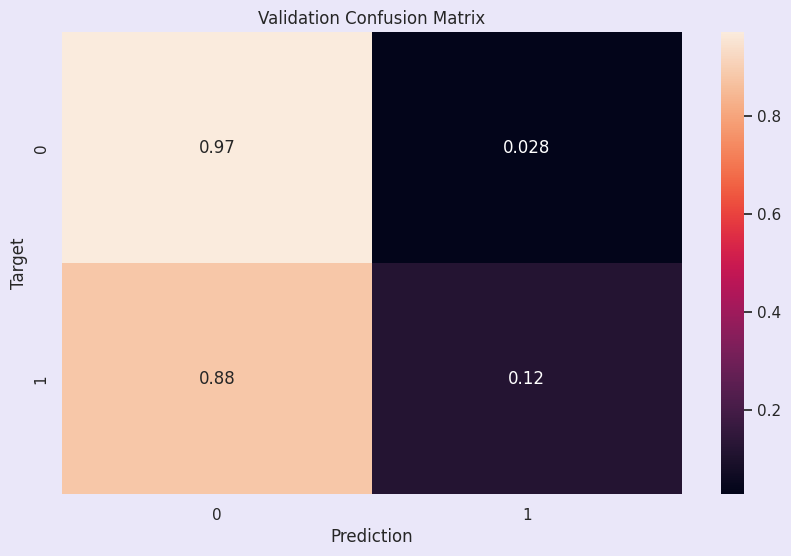

In [74]:
%%time
val_preds = predict_and_plot_2(val_inputs, val_targets, 'Validation')

:<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Decision Tree Model without hyperparameter tuning:</b><br>
Training Accuracy =  99.99% <br>
Validation Accuracy = 86.50% <br>
</div>

**Visualization**

In [75]:
from sklearn.tree import plot_tree, export_text

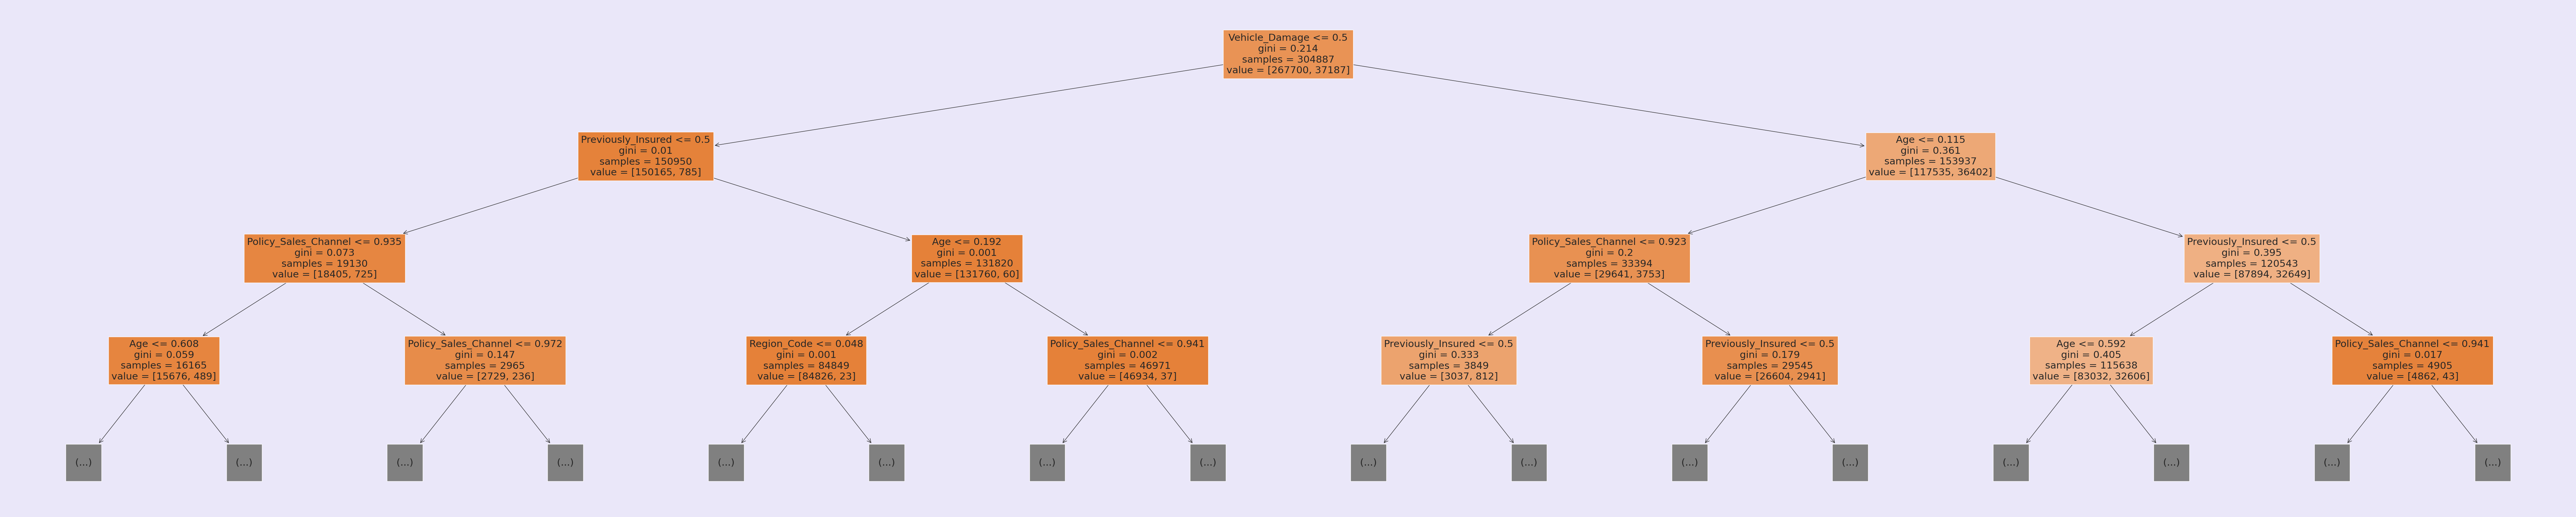

In [76]:
plt.figure(figsize=(100,20))
plot_tree(model_3, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [77]:
model_3_text=export_text(model_3, feature_names=list(train_inputs.columns))
print(model_3_text[:3000])

|--- Vehicle_Damage <= 0.50
|   |--- Previously_Insured <= 0.50
|   |   |--- Policy_Sales_Channel <= 0.94
|   |   |   |--- Age <= 0.61
|   |   |   |   |--- Policy_Sales_Channel <= 0.92
|   |   |   |   |   |--- Age <= 0.30
|   |   |   |   |   |   |--- Policy_Sales_Channel <= 0.75
|   |   |   |   |   |   |   |--- Region_Code <= 0.99
|   |   |   |   |   |   |   |   |--- Annual_Premium <= 0.20
|   |   |   |   |   |   |   |   |   |--- Age <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= 0.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  0.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  0.05
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= 0.71
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  0.71
|   |   |   |   |   |   |   |   |   |   |   

In [78]:
model_3.feature_importances_

array([0.02497463, 0.13148203, 0.00057645, 0.10268734, 0.01257527,
       0.00940411, 0.12491632, 0.27135783, 0.04471703, 0.277309  ])

In [79]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)

In [80]:
importance_df

feature  importance
9               Vintage    0.277309
7        Annual_Premium    0.271358
1                   Age    0.131482
6        Vehicle_Damage    0.124916
3           Region_Code    0.102687
8  Policy_Sales_Channel    0.044717
0                Gender    0.024975
4    Previously_Insured    0.012575
5           Vehicle_Age    0.009404
2       Driving_License    0.000576

**Testing for `max_leaf_nodes` hyperparameter**

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
params_grid = {
    'max_leaf_nodes':[5,10,15,20,25]
}

In [83]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [84]:
grid.fit(train_inputs,train_targets)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25]})

In [85]:
grid.best_params_

{'max_leaf_nodes': 5}

In [86]:
model_3_1=grid.best_estimator_

In [87]:
model_3_1.score(train_inputs, train_targets)

0.8780302210327104

In [88]:
model_3_1.score(val_inputs, val_targets)

0.8750623179659416

**Testing for `max_depth` hyperparameter**

In [89]:
params_grid = {
    'max_depth':[10,20,30,40,50]
}

In [90]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [91]:
grid.fit(train_inputs,train_targets)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50]})

In [92]:
grid.best_params_

{'max_depth': 10}

In [93]:
model_3_2=grid.best_estimator_

In [94]:
model_3_2.score(train_inputs, train_targets)

0.8789092352248538

In [95]:
model_3_2.score(val_inputs, val_targets)

0.8742226653722023

**Testing for `criterion` and `splitter` hyperparameter**

In [96]:
params_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}

In [97]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [98]:
grid.fit(train_inputs,train_targets)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [99]:
grid.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [100]:
model_3_3=grid.best_estimator_

In [101]:
model_3_3.score(train_inputs, train_targets)

0.9998852033704291

In [102]:
model_3_3.score(val_inputs, val_targets)

0.8231219333000971

**Using all the best parameters**

In [103]:
model_3_all = DecisionTreeClassifier(random_state=42,
                                       criterion='entropy',
                                       splitter='best',
                                       max_leaf_nodes=5,
                                       max_depth=10)

In [104]:
model_3_all.fit(train_inputs, train_targets)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       random_state=42)

In [105]:
model_3_all.score(train_inputs, train_targets)

0.8780302210327104

In [106]:
model_3_all.score(val_inputs, val_targets)

0.8750623179659416

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Decision Tree Model hyperparameter tuning:</b><br>
Training Accuracy =  87.80% <br>
Validation Accuracy = 87.51% <br>
<b>The training accuracy reduced but the validation accuracy improved significantly.</b>
</div>

<a id="6"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Conclusion</div>

<a id="6.1"></a>
> <span style='font-size:20px; font-family:Verdana;color: #254E58;'><b>Conclusion </b></span>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Best Model: Decision Tree Model hyperparameter tuning:</b><br>
Training Accuracy = 87.80302210327104% <br>
Validation Accuracy = 87.50623179659416% <br>
<b>The training accuracy reduced but the validation accuracy improved significantly.</b>
</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">
- Betterment of results using different hyperparameters for tuning<br>
- Implementing more models to gain better results<br>
- Using the same method to predict response for various other kinds of insurances<br>
- Combining all the processing of insurance offer advertisements and achieving the best customers for the same
</div>